# Kernel-based Deblurring
### Imports
- We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")
import time

In [2]:
from neural_de.transformations import KernelDeblurringEnhancer
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


2025-03-07 10:06:25.319018: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 10:06:25.334192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741341985.352091    7381 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741341985.357369    7381 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 10:06:25.375377: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Text(0.5, 1.0, '(427, 640, 3)')

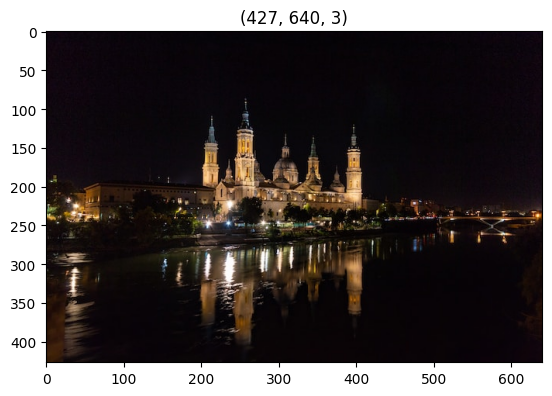

In [3]:
start=time.time()
image_path = Path('../examples/images/night.jpg')
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(image.shape)

# Let's deblur this images

- two kernels presets are provided : "high" and "medium"
- default value is "high"
- You can also use your own kernel

[03-07 10:06:28] {/home/jovyan/Maturation/NeuralDE/examples/../neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


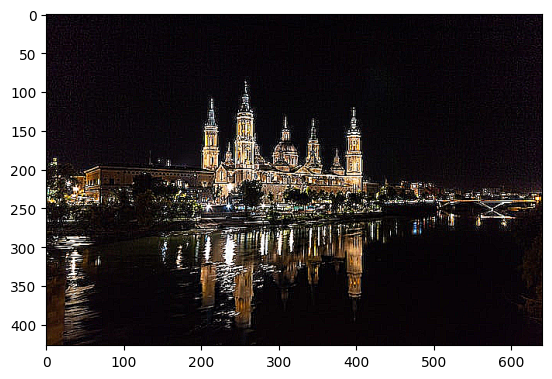

In [4]:
kerneldeblur = KernelDeblurringEnhancer()
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])

- "medium" if "high" lead to an image to far from the original one

[03-07 10:06:28] {/home/jovyan/Maturation/NeuralDE/examples/../neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


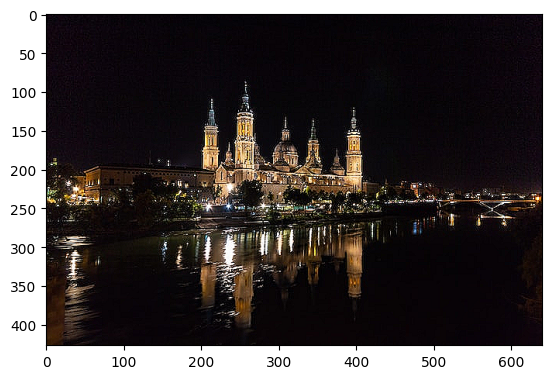

In [5]:
kerneldeblur = KernelDeblurringEnhancer(kernel="medium")
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])

You can also provide your own kernel :
- it can be any 2D custom np.array.

Here is a custom kernel with effect between "medium" and "high" :

In [6]:
# "medium-high"
custom_kernel = np.array([[-0.5, -1, -0.5], [-1, 7, -1], [-0.5, -1, -0.5]])

[03-07 10:06:29] {/home/jovyan/Maturation/NeuralDE/examples/../neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-07 10:06:29] {/home/jovyan/Maturation/NeuralDE/examples/../neural_de/transformations/_kernel_deblurring_enhancer.py:45} INFO - Custom weights loaded


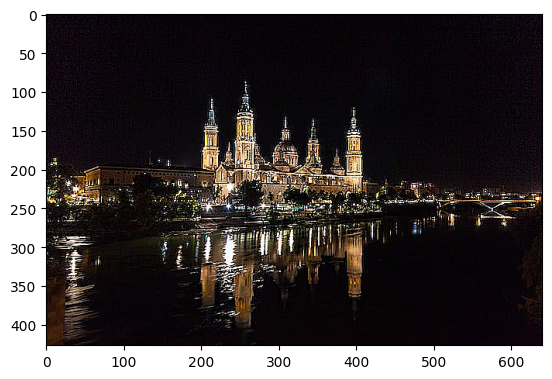

In [7]:
kerneldeblur = KernelDeblurringEnhancer(custom_kernel=custom_kernel)
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])

In [8]:
end=time.time()
print("temps final : ",end-start)

temps final :  0.7813000679016113
